# <h3 align="center">__Module 7 Activity__</h3>
# <h3 align="center">__Assigned at the start of Module 7__</h3>
# <h3 align="center">__Due at the end of Module 7__</h3><br>

# Weekly Discussion Forum Participation

Each week, you are required to participate in the module’s discussion forum. The discussion forum consists of the week's Module Activity, which is released at the beginning of the module. You must complete/attempt the activity before you can post about the activity and anything that relates to the topic. 

## Grading of the Discussion

### 1. Initial Post:
Create your thread by **Day 5 (Saturday night at midnight, PST).**

### 2. Responses:
Respond to at least two other posts by **Day 7 (Monday night at midnight, PST).**

---

## Grading Criteria:

Your participation will be graded as follows:

### Full Credit (100 points):
- Submit your initial post by **Day 5.**
- Respond to at least two other posts by **Day 7.**

### Half Credit (50 points):
- If your initial post is late but you respond to two other posts.
- If your initial post is on time but you fail to respond to at least two other posts.

### No Credit (0 points):
- If both your initial post and responses are late.
- If you fail to submit an initial post and do not respond to any others.

---

## Additional Notes:

- **Late Initial Posts:** Late posts will automatically receive half credit if two responses are completed on time.
- **Substance Matters:** Responses must be thoughtful and constructive. Comments like “Great post!” or “I agree!” without further explanation will not earn credit.
- **Balance Participation:** Aim to engage with threads that have fewer or no responses to ensure a balanced discussion.

---

## Avoid:
- A number of posts within a very short time-frame, especially immediately prior to the posting deadline.
- Posts that complement another post, and then consist of a summary of that.


# Problem 1: Traversal Algorithms  (BFS vs. DFS)

A delivery robot must navigate a warehouse modeled as a graph where nodes represent storage areas and edges represent walkable paths. You must determine the best way for the robot to explore the entire warehouse efficiently.

    A -- B -- C
    |    |    |
    D -- E -- F
    |    |    |
    G -- H -- I

```python
from collections import deque

# Define the warehouse as a graph (Adjacency List)
warehouse_graph = {
    'A': ['B', 'D'],
    'B': ['A', 'C', 'E'],
    'C': ['B', 'F'],
    'D': ['A', 'E', 'G'],
    'E': ['B', 'D', 'F', 'H'],
    'F': ['C', 'E', 'I'],
    'G': ['D', 'H'],
    'H': ['E', 'G', 'I'],
    'I': ['F', 'H']
}

def bfs(graph, start):
    # Implement BFS here

def dfs(graph, start, visited=None):
    # Implement DFS here

# Run BFS and DFS on 'A' and compare results
```

## Questions:
1. Implement the missing BFS and DFS functions in the code above.
2. What is the order of node visits using BFS vs. DFS when starting from node 'A'?
3. If the warehouse has multiple exits, which traversal method (BFS or DFS) would be better for finding the shortest exit path? Why?

### 1. Implement missing functions 
### & 
### 2. Order of Node Visits for Both

In [129]:
from collections import deque

# Define the warehouse as a graph (Adjacency List)
warehouse_graph = {
    'A': ['B', 'D'],
    'B': ['A', 'C', 'E'],
    'C': ['B', 'F'],
    'D': ['A', 'E', 'G'],
    'E': ['B', 'D', 'F', 'H'],
    'F': ['C', 'E', 'I'],
    'G': ['D', 'H'],
    'H': ['E', 'G', 'I'],
    'I': ['F', 'H']
}

def bfs(graph, start):
    # Implement BFS here
    if start not in graph:
        return None
    visited = []
    # create a queue for BFS
    queue = deque([start])
    
    while queue:
        # pop the leftmost element from the queue
        node = queue.popleft()
        # add non-visited nodes to the visited list
        if node not in visited:
            visited.append(node)
            
            # add neighbors of the node to the queue
            queue.extend(graph[node])
    return visited


def dfs(graph, start, visited=None):
    # Implement DFS here
    if visited is None:
        # store the visited nodes
        visited = []
    if start not in graph:
        return None
    # add start node to the visited list if hasn't been visited
    if start not in visited:
        visited.append(start)
        
        # recursively call the DFS function on the neighbors of the start node
        for node in graph[start]:
            dfs(graph, node, visited)
    return visited

print("BFS: ")
print(bfs(warehouse_graph, 'A'))
print("\nDFS: ")
print(dfs(warehouse_graph, 'A'))

BFS: 
['A', 'B', 'D', 'C', 'E', 'G', 'F', 'H', 'I']

DFS: 
['A', 'B', 'C', 'F', 'E', 'D', 'G', 'H', 'I']


### 3. Traversal for multiple exits
#### BFS is the better choice for finding the shortest exit path because it explores all possible paths evenly before moving deeper into the graph. When BFS encounters an exit for the first time, it has already taken the shortest possible route to reach that point. DFS prioritizes depth over breadth, so the first exit it finds may not be the shortest/most efficient route.

# Problem 2: Decision Trees - Making Predictions from Data

A company wants to predict whether a customer will buy a product based on two features: Age Group (Young, Middle, Senior) and Income Level (Low, Medium, High). They plan to use a Decision Tree to classify potential customers.

You are given the following customer data

| Person | Age Group | Income  | Buys Product? |
|--------|----------|---------|--------------|
| 1      | Young    | Low     | No           |
| 2      | Young    | Medium  | No           |
| 3      | Young    | High    | Yes          |
| 4      | Middle   | Low     | Yes          |
| 5      | Middle   | Medium  | Yes          |
| 6      | Middle   | High    | No           |
| 7      | Senior   | Low     | Yes          |
| 8      | Senior   | Medium  | Yes          |
| 9      | Senior   | High    | No           |

You may use `sklearn` to design your decision tree classifier. Your criterion for split should be what we discussed in the lecture. 

## Questions

1. Analyze the trained Decision Tree. What feature is chosen as the first split and why?
2. Suppose a new customer is "Middle-aged" with a "High" income. What is the model's predicted outcome?
3. How would increasing the depth of the Decision Tree impact it's predictions?


 Model Accuracy:  0.5


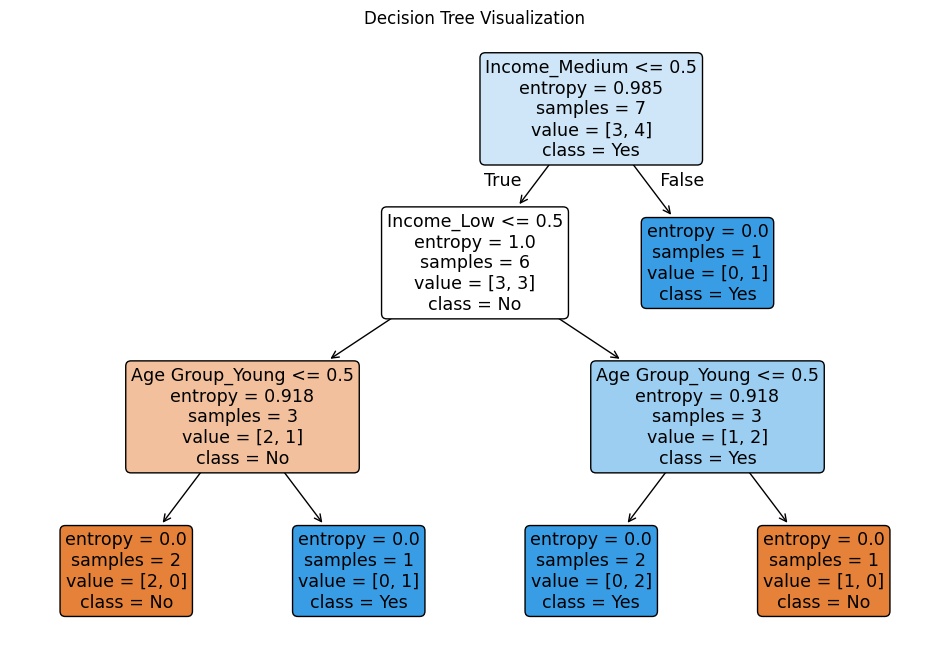


First Split Feature: Income_Medium

First Split Feature:  Income_Medium

Prediction for Middle-aged person with high income:  Yes


/Users/audreyweigel/Library/Mobile Documents/com~apple~CloudDocs/Documents/Python Projects/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [130]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# create a dataframe
data = pd.DataFrame({
    "Age Group": ["Young", "Young", "Young", "Middle", "Middle", "Middle", "Senior", "Senior", "Senior"],
    "Income": ["Low", "Medium", "High", "Low", "Medium", "High", "Low", "Medium", "High"],
    "Buys Product?": ["No", "No", "Yes", "Yes", "Yes", "No", "Yes", "Yes", "No"]
})

# encode categorical variables
data_encoded = pd.get_dummies(data, columns=["Age Group", "Income"], drop_first=True)

# split the data into features and target
X = data_encoded.drop(columns="Buys Product?")
y = data_encoded["Buys Product?"].map({"No": 0, "Yes": 1})

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create a decision tree classifier
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)

# train the classifier
clf.fit(X_train, y_train)

# make predictions
y_pred = clf.predict(X_test)

# calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\n Model Accuracy: ", accuracy)

plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

# Identify the first split feature
first_split = clf.tree_.feature[0]
first_split_feature = X.columns[first_split]
print("\nFirst Split Feature:", first_split_feature)


# identify first split feature
first_split = clf.tree_.feature[0]
first_split_feature = X.columns[first_split]
print("\nFirst Split Feature: ", first_split_feature)

# predict outcome for middle-aged person with high income
middle_high_income_customer = np.array([[1, 0, 0, 1]])
prediction = clf.predict(middle_high_income_customer)
print("\nPrediction for Middle-aged person with high income: ", "Yes" if prediction[0] == 1 else "No")

### Answers

1. The first split feature chosen is income_medium, because this one results in the most reduction of entropy.
2. Model predicted yes.
3. Increasing the depth of the decision tree allows it to learn more specific details from the training data, but it can also lead to overfitting. The model can perform well on training data but poorly on unseen data.

# Problem 3: Bayesian Networks - Probabilistic Reasoning

You are working with a medical diagnosis system that predicts the likelihood of a patient having the Flu based on symptoms like Fever and Cough.

       Flu
      /    \
   Fever   Cough

## Conditional Probability Tables

### Table 1: Prior Probability of Flu
| **Flu (F)**  | **P(F)** |
|-------------|--------|
| True (1)    | 0.10   |
| False (0)   | 0.90   |

---

### Table 2: Conditional Probability of Fever Given Flu
| **Fever (V)** | **P(V \| F=1)** | **P(V \| F=0)** |
|--------------|-------------|-------------|
| True (1)     | 0.85        | 0.30        |
| False (0)    | 0.15        | 0.70        |

---

### Table 3: Conditional Probability of Cough Given Flu
| **Cough (C)** | **P(C \| F=1)** | **P(C \| F=0)** |
|--------------|-------------|-------------|
| True (1)     | 0.70        | 0.20        |
| False (0)    | 0.30        | 0.80        |


Here is some skeleton code to get you started. You will need to fill in portions that are missing. Notice that we are going to use the Variable Elimination method in this exercise. You will need to know how to implement Gibbs for your Programming Assignment.  

```python
from pgmpy.models import BayesianModel
from pgmpy.inference import VariableElimination
from pgmpy.factors.discrete import TabularCPD

# Define Bayesian Network Structure
model = BayesianModel([('Flu', 'Fever'), ('Flu', 'Cough')])

# Define CPDs
cpd_flu = TabularCPD(variable='Flu', variable_card=2, values=[[0.9], [0.1]])
cpd_fever = 
cpd_cough = 

# Add CPDs to model
model.add_cpds(cpd_flu, cpd_fever, cpd_cough)

# Perform Bayesian Inference
inference = VariableElimination(model)
result = inference.query(variables=['Flu'], evidence={'Fever': 1, 'Cough': 1})
print(result)

```

## Questions

1. Finish the code. 
2. Compute $P(F|V=1, C=1)$. What is the probability that a patient has the Flu given that they have both Fever and Cough?
3. How would the result change if the patient had only Fever but no Cough?
4. How does increasing the number of symptoms in the network affect inference complexity?

In [131]:
from pgmpy.models import BayesianNetwork
from pgmpy.inference import VariableElimination
from pgmpy.factors.discrete import TabularCPD

# Define Bayesian Network Structure
model = BayesianNetwork([('Flu', 'Fever'), ('Flu', 'Cough')])

# Define CPDs
cpd_flu = TabularCPD(variable='Flu', variable_card=2, values=[[0.9], [0.1]])
cpd_fever = TabularCPD(variable='Fever', variable_card=2, values=[[0.15, 0.7], 
                                                                  [0.85, 0.3]], 
                                                                  evidence=['Flu'], evidence_card=[2])
cpd_cough = TabularCPD(variable='Cough', variable_card=2, values=[[0.3, 0.8], 
                                                                  [0.7, 0.2]], 
                                                                  evidence=['Flu'], evidence_card=[2])

# Add CPDs to model
model.add_cpds(cpd_flu, cpd_fever, cpd_cough)

# Perform Bayesian Inference
print("Answer #2: ")
inference = VariableElimination(model)
result = inference.query(variables=['Flu'], evidence={'Fever': 1, 'Cough': 1})
print(result)

print("\n Answer #3: ")
result_fever_only = inference.query(variables=['Flu'], evidence={'Fever': 1, 'Cough': 0})
print(result_fever_only)

Answer #2: 
+--------+------------+
| Flu    |   phi(Flu) |
+========+============+
| Flu(0) |     0.9889 |
+--------+------------+
| Flu(1) |     0.0111 |
+--------+------------+

 Answer #3: 
+--------+------------+
| Flu    |   phi(Flu) |
+========+============+
| Flu(0) |     0.9053 |
+--------+------------+
| Flu(1) |     0.0947 |
+--------+------------+


4. It makes each extra symptom increase the number of relationships the network is considering. The algorithm has to perform more calculations, and the complexity grows quickly, causing more computing time and resources to be used.

# Problem 4: Clustering using Louvain & Spectral Clustering

You are analyzing a social network where people are connected based on their interactions. Your goal is to detect communities in the network.

Here is the code for Louvain Clustering

```python
import networkx as nx
import community as community_louvain
import matplotlib.pyplot as plt

# Create a social network graph
G = nx.karate_club_graph()

# Apply Louvain Algorithm
partition = community_louvain.best_partition(G)

# Visualize the clusters
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)
cmap = plt.get_cmap("viridis")

for node, community in partition.items():
    nx.draw_networkx_nodes(G, pos, [node], node_color=[community], cmap=cmap)

nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()
```

## Questions

1. What communities were detected in the social network using Louvain clustering?
2. Perform Spectral Clustering on the same dataset using `sklearn.cluster import SpectralClustering` (Hint: Try different values for `n_clusters` to see how the clustering changes)
3. Compare the __Spectral Clustering__ to __Louvain__. Do they align?
4. Why is graph-based clustering superior to traditional K-Means clustering for network data?

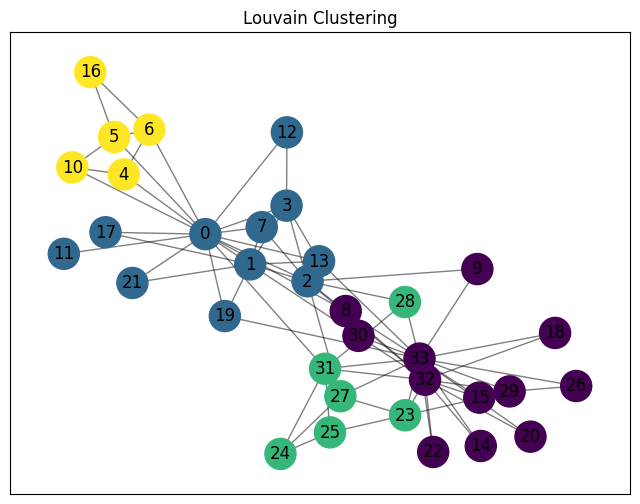

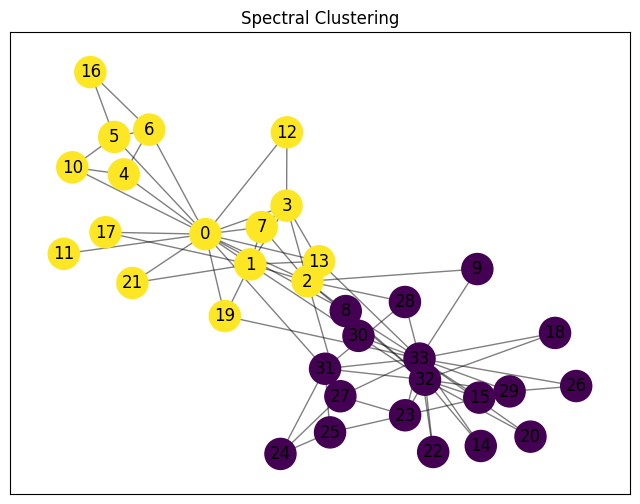

In [132]:
import networkx as nx
import matplotlib.pyplot as plt
import community.community_louvain as community_louvain
from sklearn.cluster import SpectralClustering

# Create a social network graph
G = nx.karate_club_graph()

# Apply Louvain Algorithm
partition = community_louvain.best_partition(G)

# Visualize the clusters
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)
cmap = plt.get_cmap("viridis")

nx.draw_networkx_nodes(G, pos, node_size=500, cmap=cmap, node_color=[partition[node] for node in G.nodes()])

nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos)
plt.title("Louvain Clustering")
plt.show()

# create a spectral clustering model
model = SpectralClustering(n_clusters=2, affinity='precomputed', random_state=42)

# create an adjacency matrix
adjacency_matrix = nx.to_numpy_array(G)

# fit the model
model.fit(adjacency_matrix)

# get the cluster labels
cluster_labels = model.labels_

# visualize the clusters
plt.figure(figsize=(8, 6))

nx.draw_networkx_nodes(G, pos, node_size=500, cmap=cmap, node_color=cluster_labels)
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos)
plt.title("Spectral Clustering")
plt.show()

1. Four communities were detected: yellow, blue, purple and green.
3. Spectral clustering results partially aligns with Louvain clustering, especially when the number of clusters is increased to four. Louvain clustering maximizes modularity, while spectral clustering uses eigenvalues to check the connectedness of nodes.
4. It directly considers the edges between nodes, instead of K-Means which relies on numerical distances and treats data points independently.